In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
DFrameArray = []
FileNames = []

def OneDataFrame():
    
    for f in glob.glob('Data/*xlsx'):
        df = pd.read_excel(f,sheet_name='Calificaciones')
        DFrameArray.append(df)
        FileNames.append(f)
        
    dft = pd.concat(DFrameArray,ignore_index = 'True')
    
    return dft

In [3]:
DFrameArray.append(OneDataFrame())
DFrameArray[0].head(10)

,OrgDefinedId,Last Name,First Name,Animación en Python Scheme Symbol,Derivación - Campo Eléctrico Scheme Symbol,InterpolacionNewton Scheme Symbol,Cuadratura Scheme Symbol,Colisiones Scheme Symbol,MinimoCuadradosSNL Scheme Symbol,MétodosRelajacion_MonteCarlo Scheme Symbol,IntroducciónProbabilidad Scheme Symbol,conteo Scheme Symbol,Covarianza Scheme Symbol,Bonda de Ajuste Scheme Symbol,Metropolis-Hasting H2 Molecule Scheme Symbol,Complementaria,Final
0,201819466,Moreno Moreno,David Santiago,5.0,3.42,5.0,0.00,0.0,0.37,2.5,5.0,0.0,3.74,0,4.0,3.38,2.70
1,201823065,Williamson Abril,Daniel Andres,5.0,4.50,5.0,4.25,5.0,4.58,5.0,5.0,4.5,5.00,0,0.0,2.42,4.18
2,201911620,Benitez Giraldo,Juan Felipe,5.0,4.00,5.0,3.33,1.5,0.37,2.5,5.0,4.5,3.74,0,4.0,3.90,3.57
3,201911836,Cano Martinez,Monica Maria,5.0,4.42,5.0,3.00,1.5,3.30,5.0,5.0,4.0,5.00,0,5.0,4.37,4.21
4,201911855,Cardenas Casallas,Daniel Esteban,5.0,4.05,5.0,1.50,5.0,2.90,5.0,5.0,4.0,5.00,0,5.0,3.08,4.21
5,201911976,Castro Igua,Laura Sofia,5.0,3.56,5.0,0.00,5.0,1.10,3.5,5.0,5.0,5.00,0,5.0,4.15,3.94
6,201912754,Guevara Moreno,Gloria Marcela,5.0,3.90,5.0,4.00,5.0,0.00,0.0,0.0,0.0,0.00,0,0.0,0.00,1.90
7,201912865,Herrera Alba,Eduardo Jose,5.0,5.00,5.0,5.00,5.0,5.00,5.0,5.0,5.0,5.00,0,5.0,5.00,5.00
8,201913051,Lopez Saavedra,Abigail,5.0,5.00,5.0,5.00,5.0,4.67,5.0,5.0,5.0,4.55,0,0.0,5.00,4.51
9,201913267,Menjura Florian,Sebastian Camilo,5.0,2.70,5.0,1.60,5.0,3.50,5.0,5.0,5.0,3.46,0,5.0,4.46,4.22


In [4]:
# Quitamos final 
DFrameArray[0] = DFrameArray[0].drop(['Final'],axis=1)

In [5]:
Df2 = DFrameArray[0].iloc[:,3:15]
#Df2.mean(axis=1)

In [6]:
DFrameArray[0] = DFrameArray[0].assign(Magistral75 = Df2.mean(axis=1)*0.75) 
DFrameArray[0] = DFrameArray[0].assign(Complementaria25 = DFrameArray[0].Complementaria*0.25)
DFrameArray[0] = DFrameArray[0].assign(NotaFinal = DFrameArray[0].Magistral75+DFrameArray[0].Complementaria25)

In [7]:
output = pd.ExcelWriter('Grades.xlsx')
DFrameArray[0].to_excel(output,'Calificaciones')
output.save()

In [8]:
np.mean(DFrameArray[0].NotaFinal)

3.904929245283019

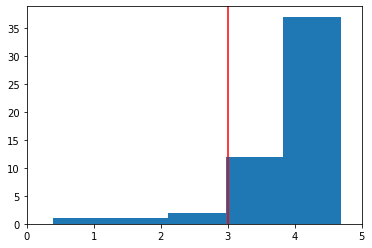

In [9]:
plt.hist(DFrameArray[0].NotaFinal,bins=5)
plt.xlim(0,5)
plt.axvline(x=3.0,color='r')
plt.show()